##### John Franklin Crenshaw

.

Physics 566 Problem Set 2

February 14, 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

In [2]:
# Plot aesthetics
plt.style.use('jfc') # a style sheet I have defined on my computer
%config InlineBackend.figure_format = 'retina'

***
#### (1) CP 5.3
###### *Plotting the Gaussian Error Function*

The Gaussian error function is defined by $E = \int_0^x e^{-t^2} dt$. Below I write a function to calculate its value. I perform the integral using the trapezoid function, using the formula discussed in the previous problem set.

In [3]:
# Trapezoid integration function
def trap_rule(x,y):
    """Approximate the integral of y(x) using the trapezoid rule.
    Note it assumes that the x samples are evenly spaced."""
    
    h = x[1]-x[0] # trapezoid width
    trap_sum = h*(0.5*y[0] + sum(y[1:-1]) + 0.5*y[-1])
    return trap_sum

In [4]:
# The Gaussian Error Function
def E(x):
    """Gaussian error function. Uses the trapezoid rule for integration."""
    
    try: # if x is a scalar
        t = np.linspace(0,x,10000)
        y = np.exp(-t**2)
        trap_sum = trap_rule(t,y)
        return trap_sum
    
    except: # if x is an array
        result = [] # array of results
        for i in x:
            t = np.linspace(0,i,10000)
            y = np.exp(-t**2)
            trap_sum = trap_rule(t,y)
            result.append(trap_sum) # append value to array of results
        return result
            

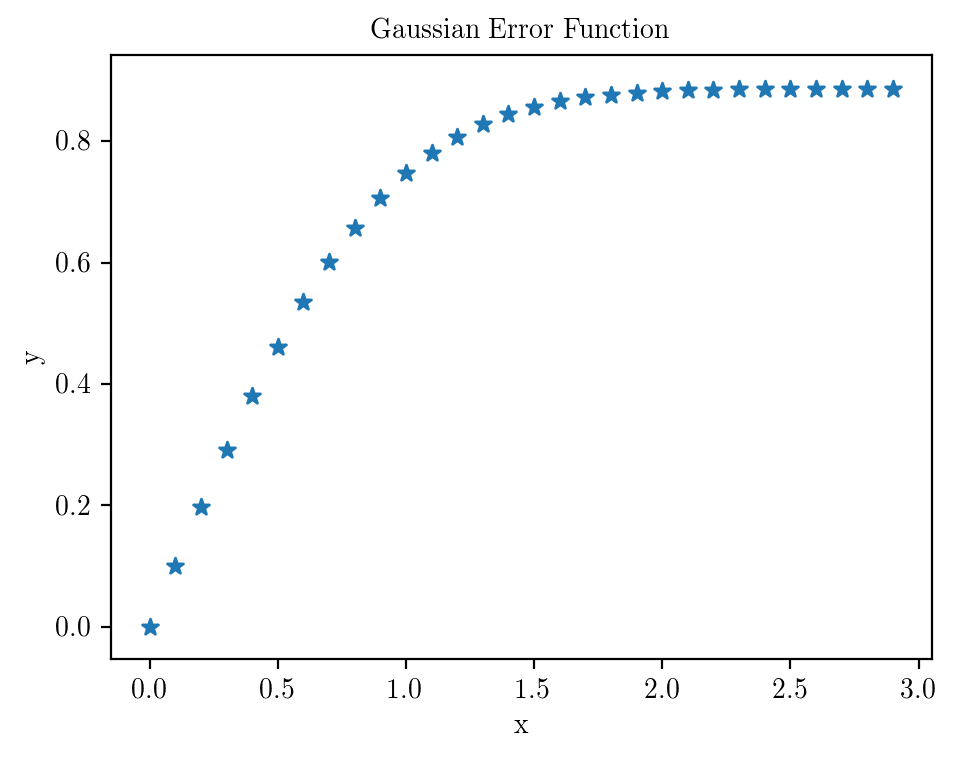

In [5]:
# Plot the gaussian error function from 0 -> 3, steps of 0.1
fig1,ax1 = plt.subplots(1,1)

x = np.arange(0,3,0.1)

ax1.scatter(x,E(x),marker='*') # plot stars for fun

ax1.set_title("Gaussian Error Function")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

plt.show()

***
#### (2) CP 5.4
###### *The diffraction limit of a telescope*

Our ability to resolve point objects in the sky (e.g. distant stars and galaxies) is limited by diffraction. A point source appears on the focal plane as a series of concentric rings whose intensity is described by the function
$$ I(r) = \left( \frac{J_1(kr)}{kr} \right)^2, $$
where $r$ is the distance from the center of the diffraction pattern, $k$ is the wavenumber of the light, and $J_1$ is a Bessel function. The Bessel functions $J_m(x)$ are given by
$$ J_m = \frac{1}{m} \int_0^{\pi} \cos(\theta - x \sin{\theta})d\theta,$$
where $m$ is a non-negative integer and $x \geq 0$.

Below I use Simpson's Rule to calculate $J_m(x)$ and plot the first three Bessel functions. Then I use $J_1$ to make a density plot of the diffraction pattern of a point source with $\lambda = 500$ nm.

In [6]:
# Simpson's Rule integration function
# this function uses the formula for Simpson's rule that was
# introduced in the last problem set

def simps_rule(x,y):
    """Approximate the integral of y(x) using Simpson's rule.
    Note it assumes that the x samples are evenly spaced."""
    
    # if len(x) is even, then there are an odd number of slices
    # Simpson's rule needs an even number of slices
    if len(x) % 2 == 0: # if len(x) is even, complain
        raise Exception("Simpson's Rule requires an even number of slices. "+
                       "This means len(x) must be odd.")
    else:
        Y = np.copy(y) # make a copy of y so that input y isn't changed
        Y[1:-1:2] *= 4 # multiply odd entries by 4, except first/last
        Y[2:-1:2] *= 2 # multiply even entries by 2, except first/last
        h = x[1]-x[0]
        #(x[-1] - x[0])/(len(x)-1) # x spacing
        simps_sum = 1/3*h*sum(Y)
        return simps_sum

In [7]:
# Bessel Function
def bessel(m,x):
    """Calculate J_m(x) where J_m is the mth Bessel function."""

    try: # if x is a scalar
        theta = np.linspace(0,np.pi,1001) # domain
        y = np.cos(m*theta-x*np.sin(theta)) # integrand
        J = 1/np.pi*simps_rule(theta,y)
        return J

    except: # if x is an array
        result = [] # array of results
        for i in x:
            theta = np.linspace(0,np.pi,1001) # domain
            y = np.cos(m*theta-i*np.sin(theta)) # integrand
            J = 1/np.pi*simps_rule(theta,y)
            result.append(J) # append calculation
        return result

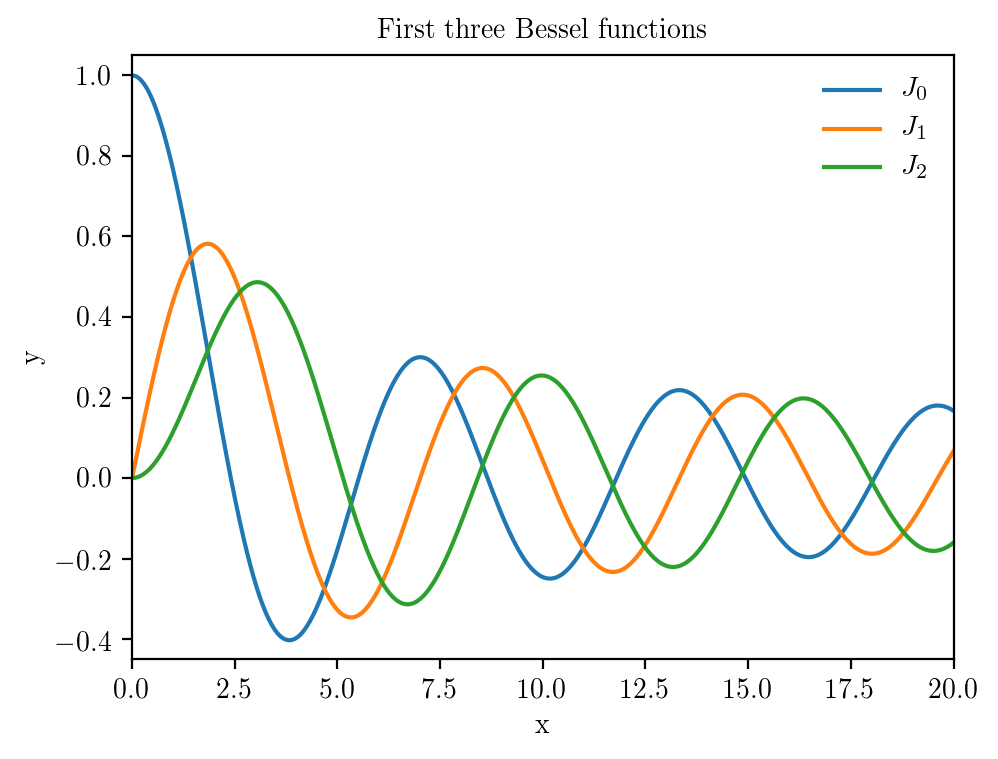

In [8]:
# Plot of the first three Bessel functions
fig2,ax2 = plt.subplots(1,1)

x = np.linspace(0,20,1000)

# Bessel Functions
ax2.plot(x,bessel(0,x),label='$J_0$')
ax2.plot(x,bessel(1,x),label='$J_1$')
ax2.plot(x,bessel(2,x),label='$J_2$')

ax2.legend()

ax2.set_title("First three Bessel functions")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

ax2.set_xlim(0,20)
ax2.set_ylim(-0.45,1.05)

plt.show()

Now I will plot the diffraction pattern

In [9]:
# set parameters
wavelength = 500e-9 # meters
radius = 1e-6 # plot radius, meters
nsamples = 400

k = 2*np.pi/wavelength # wave number

# grid of intensities
grid = np.empty([nsamples,nsamples],float)

# iterate across plane
for i,x in enumerate(np.linspace(-1*radius,radius,nsamples)):
    for j,y in enumerate(np.linspace(-1*radius,radius,nsamples)):
        r = np.sqrt(x**2 + y**2) # calculate distance
        grid[i,j] = (bessel(1,k*r)/(k*r))**2 # calc. intensity

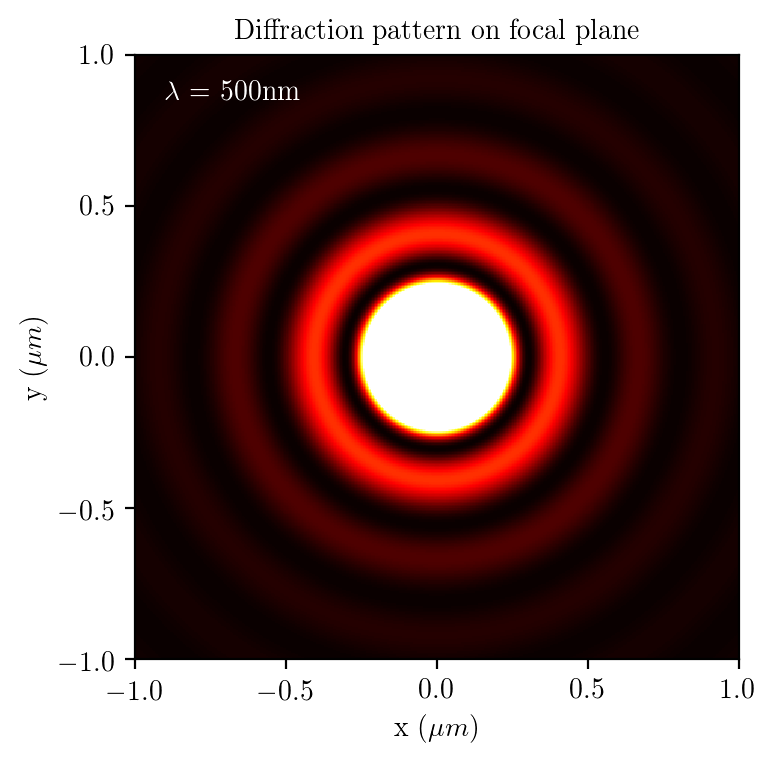

In [10]:
# Plot of diffraction pattern
fig3,ax3 = plt.subplots(1,1)

# plot
ax3.imshow(grid,vmax=0.01,origin='lower',extent=[-1,1,-1,1],cmap='hot')

# aesthetics
ax3.set_title("Diffraction pattern on focal plane")
ax3.set_xlabel("x ($\mu m$)")
ax3.set_ylabel("y ($\mu m$)")
ax3.set_xticks([-1,-0.5,0,0.5,1])
ax3.set_yticks([-1,-0.5,0,0.5,1])
ax3.text(-0.9,0.85,'$\lambda$ = 500nm',color='w',fontsize=10)

plt.show()

***
#### (3) CP 5.7
###### *Adaptive Integration and Romberg Integration*

In general, it is desirable when integrating to continously add higher order corrections until a certain level of precision is met. With trapezoid integration, this can be achieved by continuously adding more and more "sample points" to the calculation. With each iteration, you double the number of points used in the calculation, and estimate the error with
$$ \epsilon = \frac{1}{3}(I_i - I_{i-1}), $$
Where $I_i$ is the integral from the $i^{th}$ doubling. When $\epsilon$ falls below the desired tolerance, the process can be stopped. This process is known as adaptive integration.

Romberg Integration goes one step further, and adds the estimated error to the integral to improve the estimate. Let $R_{i,1}$ be the estimate from the $i^{th}$ doubling. Then one can add higher order errors using the formula
$$ R_{i,m+1} = R_{i,m} + \frac{1}{4^m-1} (R_{i,m} - R_{i-1,m}).$$

By doubling the points via adaptive integration, and adding higher order error terms to the integral, one can achieve very high precision with very few points. This process is described in detail in the text.

Here I use both methods to estimate the integral $\int_0^1 \sin^2 \sqrt{100x} dx$

In [11]:
# the function to be integrated
f = lambda x: np.sin(np.sqrt(100*x))**2

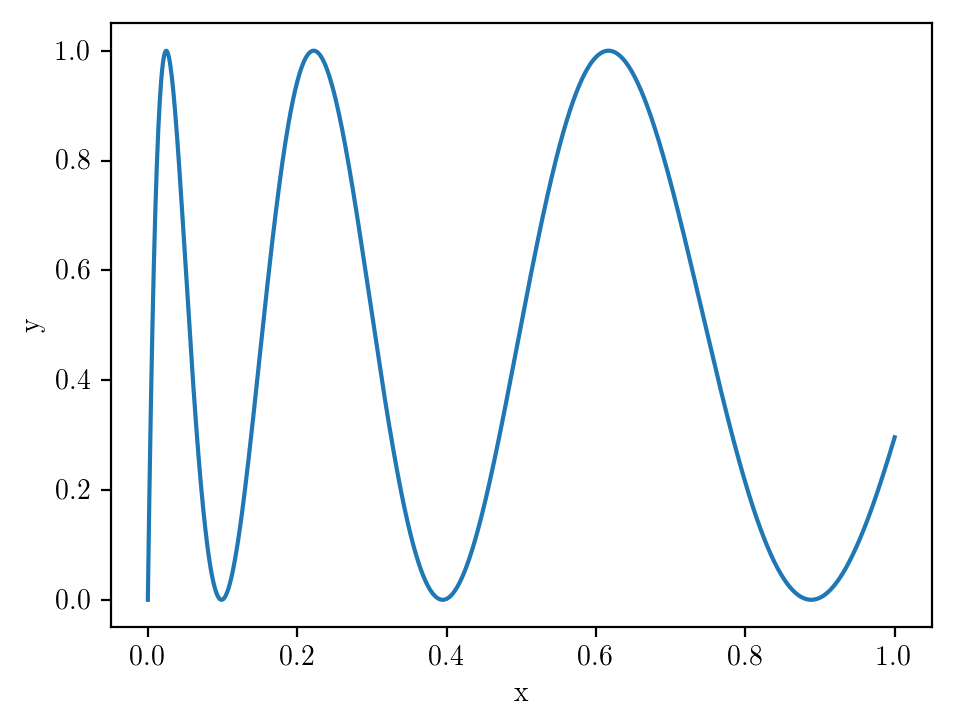

In [12]:
# visualize the function to be integrated
fig4,ax4 = plt.subplots(1,1)
x = np.linspace(0,1,1000)
ax4.plot(x,f(x))
ax4.set_xlabel('x')
ax4.set_ylabel('y')
plt.show()

Integral using adaptive trapezoidal rule:

In [13]:
def adaptive_int(f,a,b,tolerance,N=1,verbose=0):
    """Integrates f(x) from a to b using the adaptive trapezoid rule. 
    
    Integrates with the trapezoid rule, starting with N slices.
    Progressively adds more slices until error is less than tolerance.
    If verbose == 1, details of each step are printed."""
    
    x = np.linspace(a,b,N+1) # initial slices
    
    # initial estimate
    h = x[1]-x[0] # trapezoid width
    y = f(x)
    result_old = h*(0.5*y[0] + 0.5*y[-1] + sum(y[1:-1]))
    if verbose == 1:
        print("{0:<11}{1:<13}{2:<10}".format("Slices","Estimate","Error"))
        print("{0:<10}{1:< 12.6f}{2:<10}".format(N,result_old,' '))
    
    # First Correction:
    # Add points between all initial points
    x0 = np.mean([a,x[1]]) # new starting point
    xf = np.mean([x[-2],b]) # new ending point
    x = np.linspace(x0,xf,N) # new sample points
    # calcuate correction from new points
    h /= 2 # new trapezoid width
    result_new = 1/2*result_old + h*sum(f(x))
    err = 1/3*(result_new-result_old)
    if verbose == 1:
        print("{0:<10}{1:< 12.6f}{2:< 10.6f}".format(N*2,result_new,err))
    
    # if error is greater than tolerance,
    # continue to add higher level corrections.
    while abs(err) > abs(tolerance):
        result_old = result_new
        x0 = np.mean([a,x[0]]) # new starting point
        xf = np.mean([x[-1],b]) # new ending point
        N *= 2 # new number of samples
        x = np.linspace(x0,xf,N)
        h /= 2 # new trapezoid width
        result_new = 1/2*result_old + h*sum(f(x))
        err = 1/3*(result_new-result_old)
        if verbose == 1:
            print("{0:<10}{1:< 12.6f}{2:< 10.6f}".format(N*2,result_new,err))
    
    return result_new

In [14]:
adaptive_int(f,0,1,1e-6,verbose=1);

Slices     Estimate     Error     
1          0.147979             
2          0.325232    0.059084 
4          0.512283    0.062350 
8          0.402997   -0.036428 
16         0.430103    0.009035 
32         0.448415    0.006104 
64         0.453913    0.001833 
128        0.455349    0.000479 
256        0.455711    0.000121 
512        0.455802    0.000030 
1024       0.455825    0.000008 
2048       0.455831    0.000002 
4096       0.455832    0.000000 


Notice that with this method you must compute the function for 4096 $x$-values to reach the desired precision.

Integral using Romberg Integration:

In [15]:
def romberg(f,a,b,tolerance,N=1,verbose=0):
    """Integrates f(x) from a to b using Romberg integration. 
    
    Integrates with the trapezoid rule, starting with N slices.
    Progressively adds more slices until error is less than tolerance.
    If verbose == 1, the 'Romberg Triangle' is printed."""
    
    R = dict() # dictionary to hold values in Romberg Triangle

    x = np.linspace(a,b,N+1) # initial slices
    
    # initial estimate
    h = x[1]-x[0] # trapezoid width
    y = f(x)
    # store first estimate
    R[1,1] = h*(0.5*y[0] + 0.5*y[-1] + sum(y[1:-1]))
    
    # First Doubling:
    # Add points between all initial points
    x0 = np.mean([a,x[1]]) # new starting point
    xf = np.mean([x[-2],b]) # new ending point
    x = np.linspace(x0,xf,N) # new sample points
    # calcuate correction from new points
    h /= 2 # new trapezoid width
    # store second estimate
    R[2,1] = 1/2*R[1,1] + h*sum(f(x))
    # calculate error
    err = 1/3*(R[2,1]-R[1,1])
    # add error to estimate to improve it
    R[2,2] = R[2,1] + err

    
    # if error is less than tolerance,
    # continue to add higher level corrections.
    # I will continue to double the points sampled, as well
    # as adding in the error terms. Process explained in the text.
    i = 2 # we're about to start at i=3
    while abs(err) >= abs(tolerance):
        i += 1 # next level in the triangle
        
        x0 = np.mean([a,x[0]]) # new starting point
        xf = np.mean([x[-1],b]) # new ending point
        N *= 2 # new number of samples
        x = np.linspace(x0,xf,N)
        
        h /= 2 # new trapezoid width
        # new estimate from doubling
        R[i,1] = 1/2*R[i-1,1] + h*sum(f(x))
        
        # now compute errors by moving right across the triangle
        # add these errors to the estimate
        for m in range(1,i):
            # error is proportional to the difference between
            # the value to the left and the value 1 left, 1 up
            err = 1/(4**m-1)*(R[i,m]-R[i-1,m])
            # add error to estimate for better estimate
            R[i,m+1] = R[i,m] + err
    
    # If verbose ==1, print 'Romberg Triangle'
    if verbose == 1:
        
        # header
        header = '{0:<6}'.format("R(i,m)")
        for column in range(1,i+1):
            header += '{0:^ 12}'.format(column)
        print(header)
        
        # Print each row of the triangle, adding each column
        for row in range(1,i+1):
            line = '{0:^6}'.format(row)
            for column in range(1,row+1):
                line += '{0:^ 12.6g}'.format(R[row,column])
            print(line)

    # return most accurate value
    return R[i,m+1]

In [16]:
romberg(f,0,1,1e-6,verbose=1);

R(i,m)      1           2           3           4           5           6           7     
  1     0.147979  
  2     0.325232    0.384316  
  3     0.512283    0.574633    0.587321  
  4     0.402997    0.366569    0.352698    0.348974  
  5     0.430103    0.439139    0.443977    0.445426    0.445804  
  6     0.448415    0.454518    0.455544    0.455727    0.455768    0.455777  
  7     0.453913    0.455746    0.455828    0.455832    0.455832    0.455832    0.455832  


Notice with this method, you only need to compute the function for $2^6 = 64$ $x$-values. If we were integrating a function for which it took a long time to calculate each value, this method would achieve the desired precision *much* faster. 

***
#### (4) CP 5.9
###### *Calculating the heat capacity of aluminum using Gaussian Quadrature.*

Gaussian Quadrature is an integration technique that uses unevenly spaced points, which more complicated weightings than those used in the Trapezoid or Simpson's rules. For an integral using $N$ samples, points are selected as the zeros of the $N^{th}$ order Legendre Polynomial, and the weights are calculated from the first derivative of the Polynomial. One must merely look up $x$'s and $w$'s for the desired number $N$, and rescale them to the domain $(a,b)$. Gaussian Quadrature allows exact integration for polynomials of order $2D-1$. More details are found in the text.

In [17]:
# Function for gaussian quadrature
def gauss_quad(f,a,b,N):
    """Integrate f(x) from a to b using N-sample Gaussian Quadrature."""
    
    # get x-vals and weights from the Nth Legendre Poly.
    x,w = np.polynomial.legendre.leggauss(N)
    
    # rescale them to my domain
    x = 1/2*(b-a)*x + 1/2*(b+a)
    w = 1/2*(b-a)*w
    
    # perform the integral
    return(sum(w*f(x)))

I will use Gaussian Quadrature to calculate the Heat Capacity of a mass of aluminum as a function of temperature $T$. This is given by the function
$$ C_V = 9 V \rho k_B \left( \frac{T}{\theta_D} \right)^3 \int_0^{\theta_D\ /\ T} \frac{x^4 e^x}{(e^x - 1)^2} dx, $$
where $V$ is the volume, $\rho$ the number density, $k_B$ Boltzmann's constant, and $\theta_D$ the Debye temperature.

In [18]:
# Function to calculate specific heat of aluminum as a function of T

# integrand for the function
cv_integrand = lambda x: x**4*np.exp(x)*(np.exp(x)-1)**(-2)

def cv(T):
    """Calculate specific heat of aluminum as a function of T."""
    
    V = 0.001 # volume, m^3
    rh = 6.022e28 # number density, 1/m^3
    k = constants.Boltzmann # Boltzmann constant
    th = 428 # Debye Temperature, Kelvin
    
    try: # iterate if T is an array
        return [9*V*rh*k*(t/th)**3*gauss_quad(cv_integrand,0,th/t,50) for t in T]
    
    except: # just calculate if T is a scalar
        return 9*V*rh*k*(T/th)**3*gauss_quad(cv_integrand,0,th/T,50)

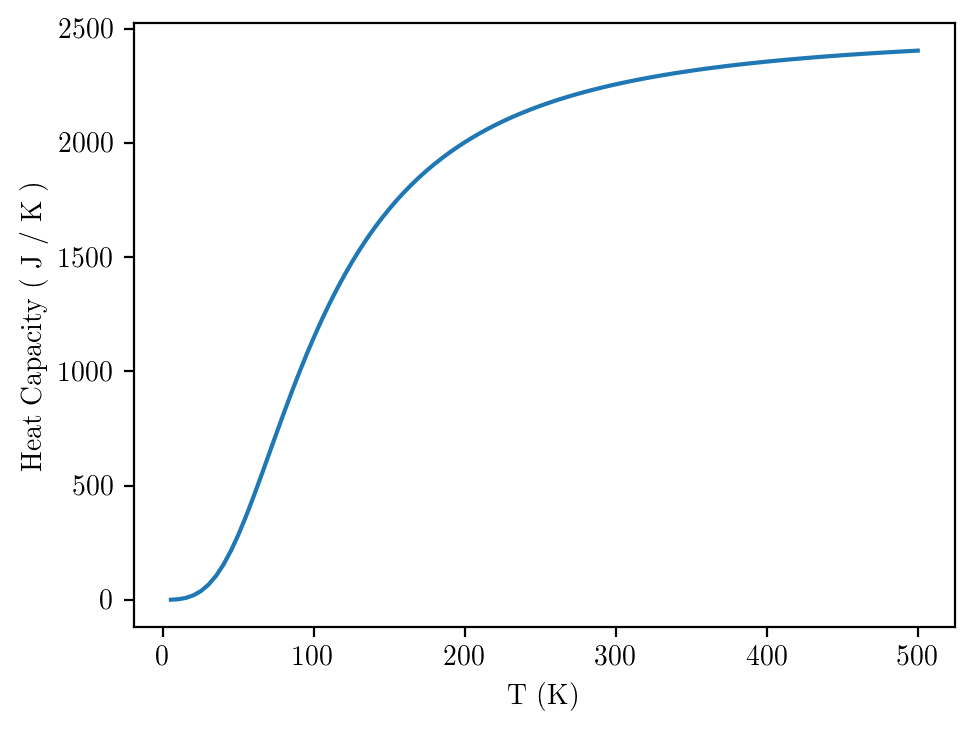

In [19]:
# Specific heat of aluminum as a function of temperature
fig5,ax5 = plt.subplots(1,1)

T = np.linspace(5,500,100)

ax5.plot(T,cv(T))

ax5.set_xlabel('T (K)')
ax5.set_ylabel('Heat Capacity ( J / K )')

plt.show()

***
#### (5) CP 5.10
###### *Anharmonic Oscillator*

Consider an anharmonic oscillator characterized by the symmetric potential $V(x)$. Conservation of energy in this system is expressed
$$ E = \frac{1}{2} m \left(\frac{dx}{dt}\right)^2 + V(x). $$
At time $t=0$ the particle of mass $m$ is released from rest at $x=a$. Since the particle is initially at rest, $dx/dt|_{t=0} = 0$, so $E = V(a)$.
Plugging this into the previous equation and solving for $dx/dt$, we have
$$ \frac{dx}{dt} = \sqrt{\frac{2}{m}(V(a)-V(x))} .$$
Separating variables and integrating we find
$$ T = \int_0^T dt = 2\sqrt{\frac{m}{2}} \int_{-a}^{a} \frac{dx}{\sqrt{V(a)-V(x)}} = \sqrt{8m} \int_{0}^{a} \frac{dx}{\sqrt{V(a)-V(x)}},$$
where in the last step we used the symmetry of the potential.

Consider the potential $V(x) = x^4$ and a particle of mass $m=1$. I will use Gaussian quadrature to calculate the period as a function of amplitude.

In [20]:
# function to calculate period

V = lambda x: x**4 # potential function
def period(a):
    """Calculate period for anharmonic oscillator V(x) = x^4, amplitude a."""
    
    try: # if a is a scalar
        period_integrand = lambda x: (V(a)-V(x))**(-0.5)
        Period = np.sqrt(8)*gauss_quad(period_integrand,0,a,20)
        return Period
    
    except: # if a is an array
        result = []
        for i in a:
            period_integrand = lambda x: (V(i)-V(x))**(-0.5)
            Period = np.sqrt(8)*gauss_quad(period_integrand,0,i,20)
            result.append(Period)
        return result

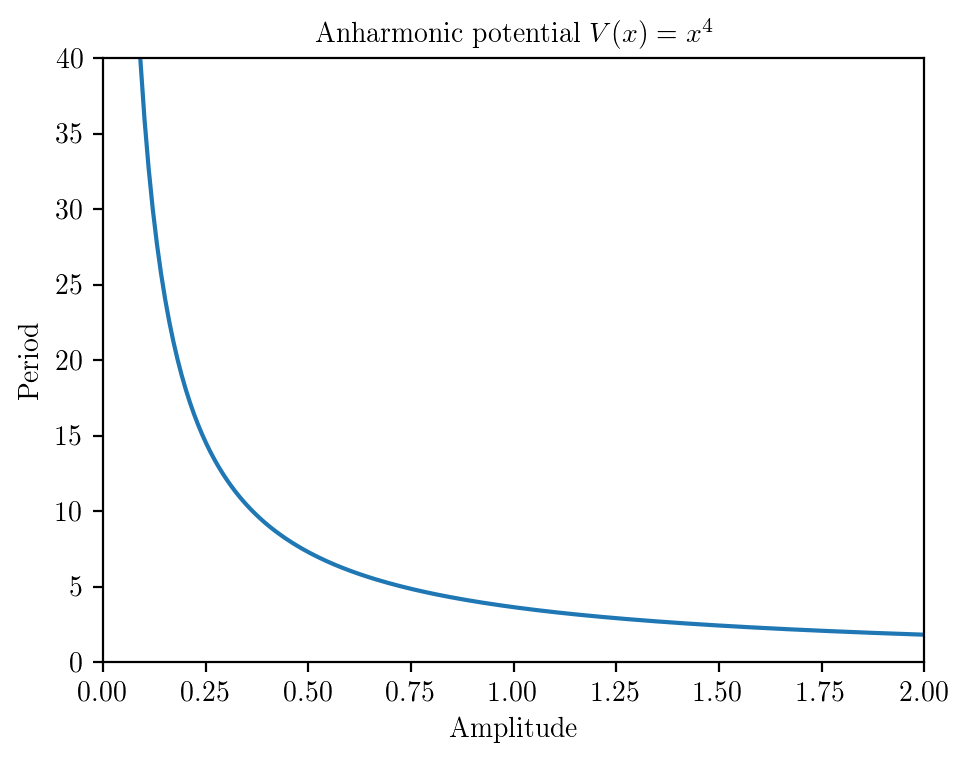

In [21]:
# Plot period as a function of amplitude
fig6,ax6 = plt.subplots(1,1)

a = np.linspace(0.001,2,200)
ax6.plot(a,period(a))

# Note the units are arbitrary
ax6.set_xlabel("Amplitude")
ax6.set_ylabel("Period")
ax6.set_xlim(0,2)
ax6.set_ylim(0,40)

ax6.set_title("Anharmonic potential $V(x) = x^4$")

plt.show()

Notice that as amplitude increases, the period decreases, despite the increase in distance traveled. Furthermore, as amplitude decreases to zero, the period diverges. This can be understood by comparing the distance and the max acceleration: Amplitude decreases like x, but acceleration decreases like $-\nabla V(x) = -3x^2$. Thus the maximum acceleration decreases faster than the distance that needs to be traversed.

***
#### (6) CP 5.11
###### *Diffraction around edges*

Imagine a plane wave blocked by a straight edge. The wave will diffract at the edge, and the intensity of the wave past the edge will be distorted. Assume the edge is the negative-x half of the x-y plane. Then the diffraction of the wave is described by
$$ \frac{I}{I_0} = \frac{1}{8} \left( [2C(u)+1]^2 + [2S(u)+1]^2 \right), $$
where $I_0$ is the intesity of the wave before diffraction and
$$ u = x \sqrt{\frac{2}{\lambda z}}, \quad C(u) = \int_0^u \cos{\frac{1}{2}\pi t^2} dt, \quad S(u) = \int_0^u \sin{\frac{1}{2}\pi t^2} dt. $$

I will use Gaussian quadrature to solve for, as a function of $x$, the intensity of a $\lambda = 1$m wave at $z=3$m.

In [22]:
# Function to calculate intensity of diffracted wave
def edge_diffraction(x):
    """Calculate relative intensity of edge-diffracted wave.
    
    Assumes a 1m wave diffracted from edge at z=0, x<0; observed at z=3."""
    
    wavelength = 1 # m
    z = 3 # m
    u = x*np.sqrt(2/(wavelength*z)) # variable related to observation location
    
    C_integrand = lambda t: np.cos(0.5*np.pi*t**2)
    S_integrand = lambda t: np.sin(0.5*np.pi*t**2)
        
    try: # if x is an array
        C = np.array([gauss_quad(C_integrand,0,i,50) for i in u])
        S = np.array([gauss_quad(S_integrand,0,i,50) for i in u])
        
    except: # if x is a scalar
        C = gauss_quad(C_integrand,0,u,50)
        S = gauss_quad(S_integrand,0,u,50)
        
    return 1/8*((2*C+1)**2+(2*S+1)**2)

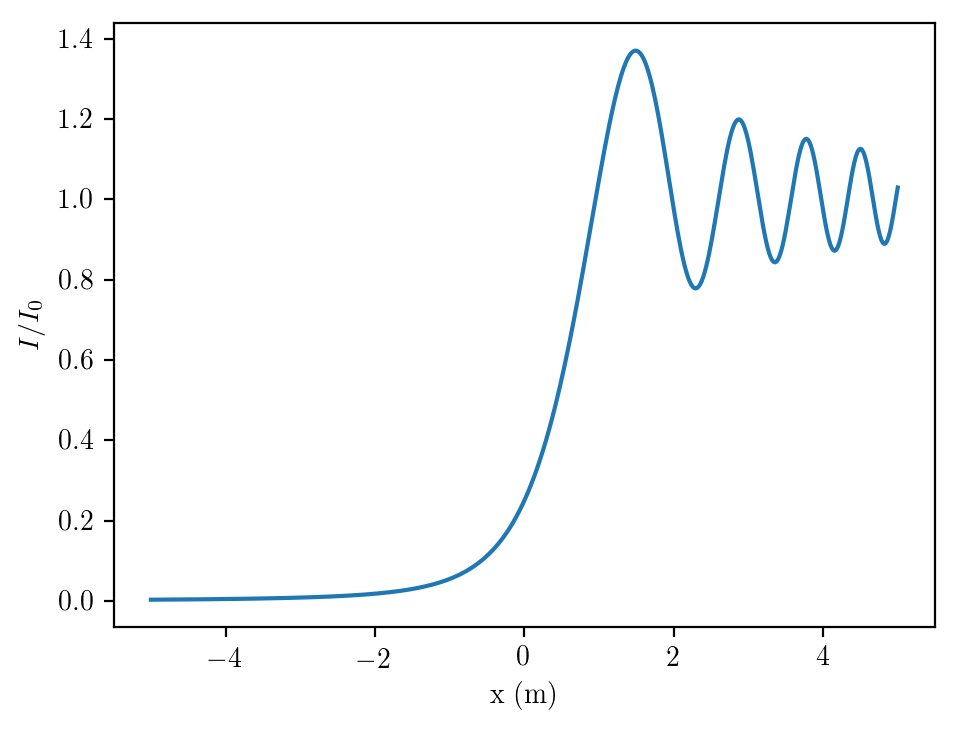

In [23]:
# Plot relative intensity
fig7,ax7 = plt.subplots(1,1)

x = np.linspace(-5,5,500)
ax7.plot(x,edge_diffraction(x))

ax7.set_xlabel("x (m)")
ax7.set_ylabel("$I/I_0$")

plt.show()

***
#### (7) CP 5.11
###### *Calculating the Stefan-Boltzmann constant.*

Planck's Law states that the power spectral density of a black body of unit area at temperature $T$ is
$$ I(\omega) = \frac{\hbar}{4\pi^4c^2}\frac{\omega^3}{e^{\hbar\omega/k_BT}-1}. $$
Thus the total power radiated by the black body is
$$ W = \int_0^\infty = \frac{\hbar}{4\pi^2c^2} \int_0^\infty \frac{\omega^3 d\omega}{e^{\hbar\omega/k_BT}-1}.  $$
If we use the change of variable $x = \frac{\hbar\omega}{k_BT}$, we have
$$ W = \frac{k_B^4T^4}{4\pi^2c^2\hbar^3} \int_0^\infty \frac{x^3}{e^x-1}dx.$$
Notice that the integral is totally independent of $T$, meaning that the function can be rewritten as $W = \sigma T$, where
$$ \sigma = \frac{k_B^4}{4\pi^2c^2\hbar^3} \int_0^\infty \frac{x^3}{e^x-1}dx. $$
The value of $\sigma$, the Stefan-Boltzmann constant, was known before Planck developed his theory of radiation. Below I will calculate it using Gaussian quadrature.

To perform the integral with an infinite bound, I need to make a second change of variables, $z = \frac{x}{1+x}$. We then have
$$ \sigma = \frac{k_B^4}{4\pi^2c^2\hbar^3} \int_0^1 \frac{z^3 dz}{(1-z)^5(e^{\ z/(1-z)}-1)}. $$
This integral is ready to be integrated numerically.

Note that I expect Gaussian quadrature will yield a very accurate result, as I am using 31 samples, which is accurate for polynomials up to order 61. The integrand can be expanded in a Taylor Series, and as the domain is strictly $< 1$, it is reasonable to assume we can safely ignore terms of order 62 and higher.

In [24]:
# relevant physical constants
k = constants.Boltzmann
hbar = constants.hbar
c = constants.speed_of_light

# calculate the value
sb_integrand = lambda z: z**3/((1-z)**5*(np.exp(z/(1-z)) - 1))
sb = k**4/(4*np.pi**2*c**2*hbar**3)*gauss_quad(sb_integrand,0,1,31)

# get true value from scipy for comparison
sb_true,_,sb_uncert = constants.physical_constants['Stefan-Boltzmann constant']

print("My estimate of the Stefan-Boltzmann constant is "+
      "{0:.6e} W m^-2 K^-4.".format(sb))
print(("Scipy says the true value is {0:.6e} with uncertainty "+
       "{1}.").format(sb_true,sb_uncert))

My estimate of the Stefan-Boltzmann constant is 5.670367e-08 W m^-2 K^-4.
Scipy says the true value is 5.670367e-08 with uncertainty 1.3e-13.


My calculation agrees with the measured value to the maximum possible precision.

***
#### (8) CP 5.12
###### *Quantum Harmonic Oscillator*

If all constants are set to unity, the wavefunction for the $n^{th}$ energy level of the one-dimensional quantum harmonic oscillator is given by
$$ \psi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}} e^{-x^2/2} H_n(x), $$
where $H_n(x)$ is the $n^{th}$ Hermite polynomial. The Hermite polynomials can be constructed with the recursion formula
$$ H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x), $$
where $H_0(x) = 1$ and $H_1(x) = 2x$. Below I plot the first 4 energy levels of the quantum harmonic oscillator, as well as the 31st level.


In [25]:
# function for the Hermite polynomials
def H(n,x):
    """Calculate H_n(x) where H_n is the nth Hermite polynomial."""
    
    # dictionary to hold values
    H = dict()
    
    # define first two polynomials
    H[0] = 1
    H[1] = 2*x
    
    # iteratively build H_n(x)
    for i in range(1,n):
        H[i+1] = 2*x*H[i] - 2*i*H[i-1]
        
    # if n = 0 AND x is an array, then we need to manually return
    # an array of 1's rather than a single 1.
    if n == 0:
        try: # this will fail if x isn't an array
            return np.ones(len(x))
        except: # if x isn't an array, do nothing
            pass
        
    return H[n]

In [26]:
# function to calculate the wave function of the quantum harmonic oscillator
def quantum_oscillator(n,x):
    """Calculate the probability amplitude at position x for the nth 
    energy level of the quantum harmonic oscillator."""
    
    c = 1/np.sqrt(2**n*np.math.factorial(n)*np.sqrt(np.pi)) # normalization
    
    # return normalization*exponential*Hermite polynomial
    return c*np.exp(-x**2/2)*H(n,x)
    

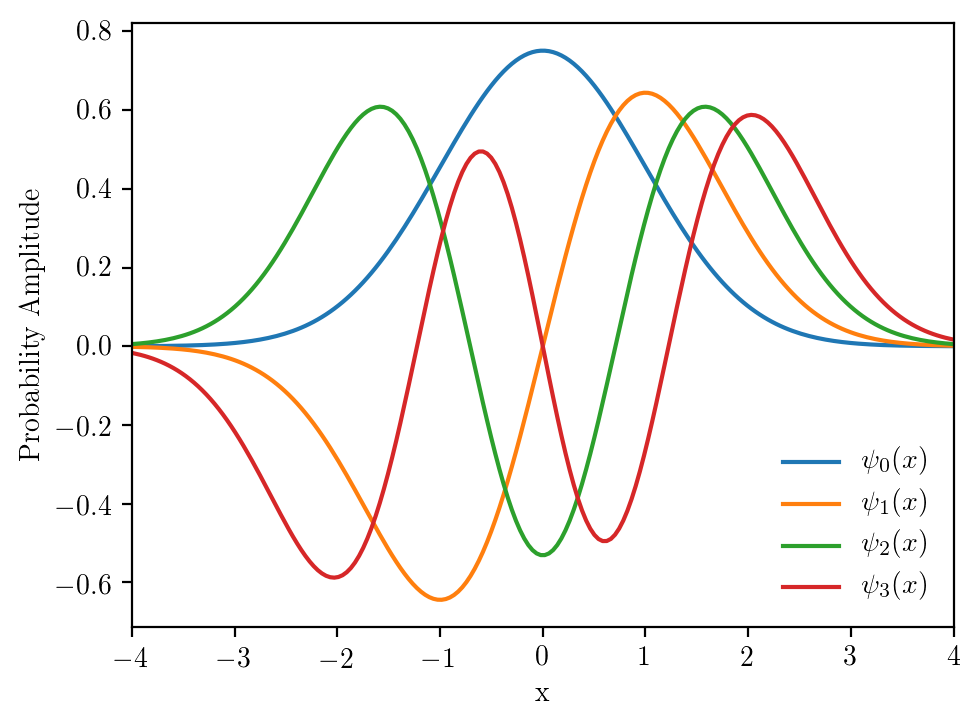

In [27]:
# plot the first 4 energy levels
fig8,ax8 = plt.subplots(1,1)

x = np.linspace(-4,4,200)
ax8.plot(x,quantum_oscillator(0,x),label="$\psi_0(x)$")
ax8.plot(x,quantum_oscillator(1,x),label="$\psi_1(x)$")
ax8.plot(x,quantum_oscillator(2,x),label="$\psi_2(x)$")
ax8.plot(x,quantum_oscillator(3,x),label="$\psi_3(x)$")

ax8.legend()

ax8.set_xlabel("x")
ax8.set_ylabel("Probability Amplitude")

ax8.set_xlim(-4,4)

plt.show()

Now a plot of the 31st energy level:

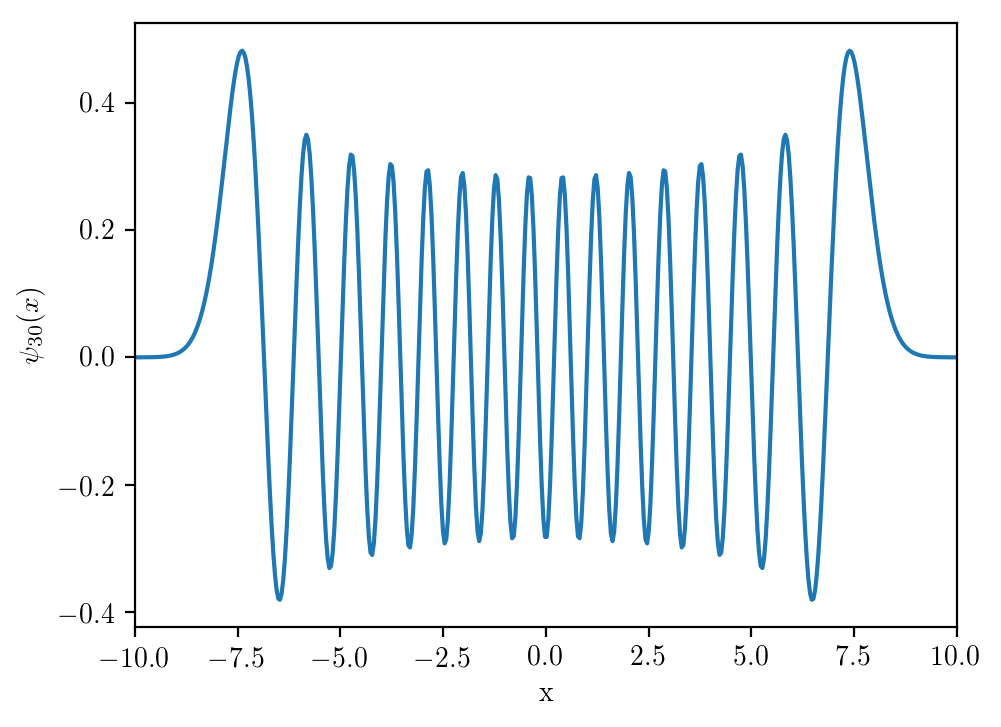

In [28]:
fig9,ax9 = plt.subplots(1,1)

x = np.linspace(-10,10,500)
ax9.plot(x,quantum_oscillator(30,x))

ax9.set_xlabel("x")
ax9.set_ylabel("$\psi_{30}(x)$")

ax9.set_xlim(-10,10)

plt.show()

The uncertainty in the position of a particle is given by
$$ \Delta x = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}.$$
For the quantum harmonic oscillator, $\langle x \rangle = 0$, so $\Delta x = \sqrt{\langle x^2 \rangle}$. 

$\langle x^2 \rangle$ is given by
$$ \langle x^2 \rangle = \int_{-\infty}^\infty x^2 |\psi_n(x)|^2dx = 2\int_0^\infty x^2 |\psi_n(x)|^2dx,$$
where at the last step I exploit the symmetry of the integrand. Again we can make the variable change $z = \frac{x}{1+x}$ to remove the infinite bound. We now have
$$ \langle x^2 \rangle = 2 \int_0^1 \frac{z^2}{(1-z)^4}\ \left|\ \psi_n \left(\frac{z}{1-z}\right) \right|^2 dz.$$

Below I write a program to calculate the uncertainty for a given energy level.

In [29]:
def x_uncert(n):
    """Calculate position uncertainty for nth energy level 
    of quantum harmonic oscillator"""
    
    integrand = lambda z: z**2/(1-z)**4*(quantum_oscillator(n,z/(1-z)))**2
    uncert_x = np.sqrt(2*gauss_quad(integrand,0,1,100))
    return uncert_x

Now I will calculate the position uncertainty for the 6th energy level:

In [30]:
print("The position uncertainty of the 6th energy "+
      "level (n=5) is {0:.2f}".format(x_uncert(5)))

The position uncertainty of the 6th energy level (n=5) is 2.35


***
#### (9) CP 5.19
###### *Diffraction grating*

Light of wavelength $\lambda$ is incident on a diffraction grating of total width w, is diffracted, and subsequently focused by a lens of focal length $f$. The intensity of the light on a screen at distance $f$ on the other side of the lens is
$$ I(x) = \left|\ \int_{-w/2}^{w/2} \sqrt{q(u)}\ e^{\ i\cdot 2\pi xu\ /\ \lambda f} du\ \right|^2, $$
where $x$ is the distance on the screen from the central axis and $q(u)$ is the "intensity transmission function" of the diffraction grating at a distance $u$ on the grating from the central axis, i.e. the fraction of the incident light that the grating lets through.

Consider a grating with the transmission function $q(u) = \sin^2{\alpha u}$. We can consider the center of the grating slits to be at the maxima of this function. Since $\sin^2{\theta}$ has period $\pi$, the separation of these slits is $\frac{\pi}{\alpha}$. Thus a grating with slit separation $20 \mu m$ has $\alpha = \frac{\pi}{20 \mu m}$.

In [31]:
def q1(u):
    """Intensity transmission function 1"""
    alpha = np.pi/20e-4 # cm^-1
    return np.sin(alpha*u)**2

Now I will write a function to calculate $I(x)$ for arbitrary $q(u)$ given a diffraction grating of width $200 \mu m$, a lens of focal length 1m, and incident light of wavelength 500nm.

In [32]:
def intensity(x,q):
    """Intensity as a function of position x on the screen, 
    given transmission function q."""
    
    # parameters
    wavelength = 500e-7 # cm
    f = 100 # lens focal length, cm
    w = 10*20e-4 # grating width, cm
    
    # perform the integral
    domain = np.linspace(-w/2,w/2,1001)
    integrand = lambda u: np.sqrt(q(u))*np.exp(2j*np.pi*x*u/(wavelength*f))
    y = integrand(domain)
    simps_sum = simps_rule(domain,y)
    
    # return intensity
    return abs(simps_sum)**2    

Now I plot the diffraction pattern for this initial $q(u)$:

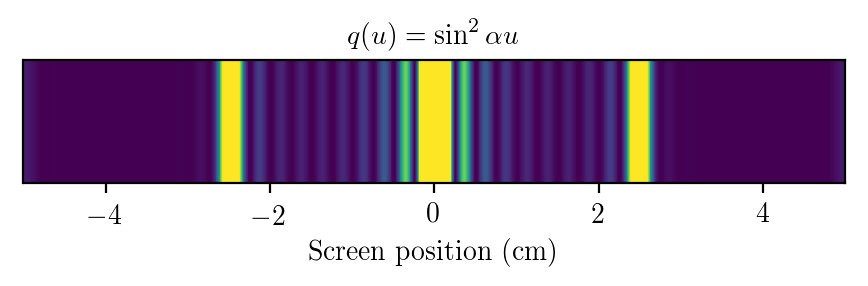

In [33]:
# plot of diffraction pattern for the first transmision function
fig10,ax10 = plt.subplots(1,1)

diff_pattern1 = [intensity(i,q1) for i in np.linspace(-5,5,1000)]
ax10.imshow([diff_pattern1,diff_pattern1],vmax=1e-5,extent=[-5,5,-0.75,0.75])

ax10.set_title(r"$q(u) = \sin^2{\alpha u}$")
ax10.set_xlabel("Screen position (cm)")
ax10.set_xticks([-4,-2,0,2,4])
ax10.set_yticks([])

plt.show()

Now I plot another diffraction pattern, this time with $q(u) = \sin^2{\alpha u} \cdot \sin^2{\beta u}$ where $\beta = \frac{1}{2} \alpha$.

In [34]:
def q2(u):
    """Intensity transmission function 2"""
    alpha = np.pi/20e-4 # cm^-1
    beta = 0.5*alpha
    return np.sin(alpha*u)**2*np.sin(beta*u)**2

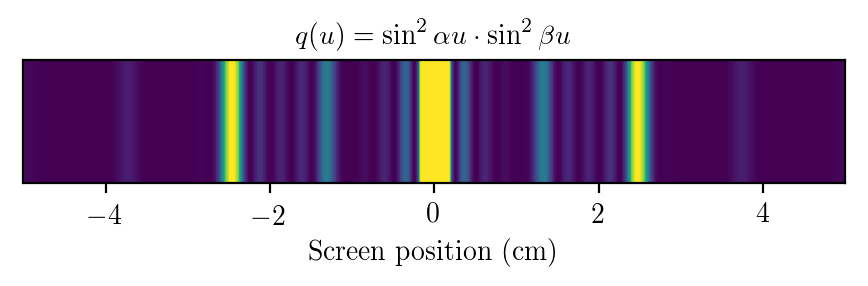

In [35]:
# plot of diffraction pattern for the second transmision function
fig11,ax11 = plt.subplots(1,1)

diff_pattern2 = [intensity(i,q2) for i in np.linspace(-5,5,1000)]
ax11.imshow([diff_pattern2,diff_pattern2],vmax=1e-5,extent=[-5,5,-0.75,0.75])

ax11.set_title(r"$q(u) = \sin^2{\alpha u} \cdot \sin^2{\beta u}$")
ax11.set_xlabel("Screen position (cm)")
ax11.set_xticks([-4,-2,0,2,4])
ax11.set_yticks([])

plt.show()

Finally I plot a third diffraction pattern, this time with a $q(u)$ that features two "square" slits, within which 100% of light is transmitted. The left slit is $10 \mu m$ and the right is $20 \mu m$. They are separated by $60 \mu m$.

In [36]:
def q3(u):
    """Intensity transmission function 3"""
    result = []
    for i in u:
        # 100% transmitted inside slits
        if i >= -40e-4 and i <= -30e-4:
            result.append(1)
        elif i >= 30e-4 and i <= 50e-4:
            result.append(1)
        # 0% transmitted elsewhere
        else:
            result.append(0)
    return result

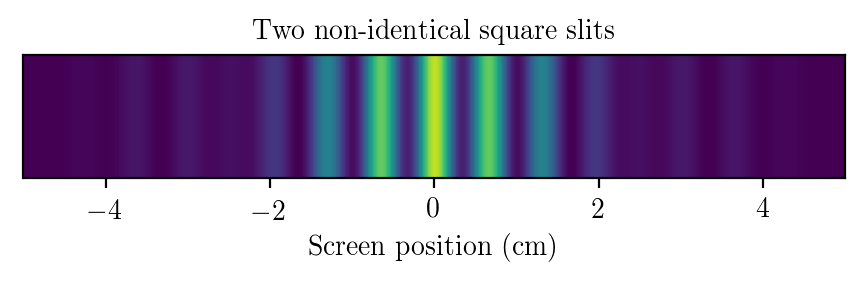

In [37]:
# plot of diffraction pattern for the second transmision function
fig12,ax12 = plt.subplots(1,1)

diff_pattern3 = [intensity(i,q3) for i in np.linspace(-5,5,1000)]
ax12.imshow([diff_pattern3,diff_pattern3],vmax=1e-5,extent=[-5,5,-0.75,0.75])

ax12.set_title("Two non-identical square slits")
ax12.set_xlabel("Screen position (cm)")
ax12.set_xticks([-4,-2,0,2,4])
ax12.set_yticks([])

plt.show()